In [1]:
# from modules.polyfit import Polyfit
# from modules.paramtune import Paramtune

# summer_fits = Polyfit('summer_data_4alphaS/fits.npz', input_h5='summer_data_4alphaS/4alphas_50runs_inputdata.h5',
#  order=3, covariance = True, fit_obs = list(range(1,16)), cpu = True, pdf_uncertainty = True)
# #take first two bins of first 15 observables (which have 8 bins each)
# target_bins = [i for i in range(8*15) if i%8 == 0 or i%8 == 1]
# summer_tune_no_err = Paramtune('summer_data_4alphaS/fits.npz', 'summer_data_4alphaS/HEPData-ins1736531-v1-csv.h5',
#  covariance = False, target_bins = target_bins, cpu = True)
# summer_tune_cov = Paramtune('summer_data_4alphaS/fits.npz', 'summer_data_4alphaS/HEPData-ins1736531-v1-csv.h5',
#  covariance = True, target_bins = target_bins, cpu = True)


In [1]:
from modules.polyfit import Polyfit
from modules.paramtune import Paramtune
#exclude this mc_run from the data to tune as target
mc_target = 6
# summer_fits = Polyfit('summer_data_4alphaS/fits.npz', input_h5='summer_data_4alphaS/4alphas_50runs_inputdata.h5',
#  order=3, covariance = True, fit_obs = list(range(1,16)), mc_target = mc_target, cpu = True)
#take first two bins of first 15 observables (which have 8 bins each)
target_bins = [i for i in range(8*15) if i%8 == 0 or i%8 == 1]
summer_tune_no_err = Paramtune('summer_data_4alphaS/fits.npz', 'summer_data_4alphaS/HEPData-ins1736531-v1-csv.h5',
 covariance = False, target_bins = target_bins, mc_target = mc_target, cpu = True)
summer_tune_cov = Paramtune('summer_data_4alphaS/fits.npz', 'summer_data_4alphaS/HEPData-ins1736531-v1-csv.h5',
 covariance = True, target_bins = target_bins, mc_target = mc_target, cpu = True)


loading  summer_data_4alphaS/fits.npz
Calculated inital guess:  [0.11163957 0.12770282 0.14877674 0.1558911 ]
Tuned Parameters:  [0.11039972 0.12912248 0.13489726 0.1439198 ] , Objective =  0.26100117616930596 , chi2/ndf =  0.010038506775742537
Covariance of Tuned Parameters:  [[ 3.19781937e-05 -3.39518574e-06 -1.05122498e-05 -2.13253409e-05]
 [-3.39518574e-06  3.11359929e-06 -8.29615800e-06  2.05158974e-06]
 [-1.05122498e-05 -8.29615800e-06  6.44293557e-05  1.34228011e-05]
 [-2.13253409e-05  2.05158974e-06  1.34228011e-05  5.50206283e-05]]
loading  summer_data_4alphaS/fits.npz
Calculated inital guess:  [0.10374987 0.14649921 0.13938641 0.10658117]
Tuned Parameters:  [0.10037 0.1492  0.14968 0.10034] , Objective =  0.008129931920695065 , chi2/ndf =  0.00031268968925750253
Covariance of Tuned Parameters:  [[-7.87165520e-06 -3.70867541e-06 -6.96490297e-06  1.26326450e-05]
 [-3.70867541e-06 -1.27129905e-05  1.88072059e-06 -4.87395696e-06]
 [-6.96490297e-06  1.88072059e-06 -1.07557401e-05 

In [10]:
print(summer_tune_no_err.fits.mc_target_X)
print(summer_tune_no_err.p_opt.x)
print(summer_tune_cov.p_opt.x)

[0.12511 0.12793 0.14155 0.12071]
[0.11039972 0.12912248 0.13489726 0.1439198 ]
[0.10037 0.1492  0.14968 0.10034]


In [3]:
import jax.numpy as jnp
print(summer_tune_cov.objective(summer_tune_cov.p_opt.x, *summer_tune_cov.obj_args))
print(summer_tune_cov.objective(jnp.array([0.127, 0.126, 0.127, 0.140]), *summer_tune_cov.obj_args))

0.008129931920695065
0.2758841314238113


['TSalphaS' 'MPIalphaS' 'SSalphaS' 'SPalphaS']
target deviation 28.8638, with confidence level 0.6827, edof 26.0000
target deviation 28.8638, with confidence level 0.6827, edof 26.0000
target deviation 28.8638, with confidence level 0.6827, edof 26.0000
target deviation 28.8638, with confidence level 0.6827, edof 26.0000
target deviation 28.8638, with confidence level 0.6827, edof 26.0000
target deviation 28.8638, with confidence level 0.6827, edof 26.0000
target deviation 28.8638, with confidence level 0.6827, edof 26.0000
target deviation 28.8638, with confidence level 0.6827, edof 26.0000


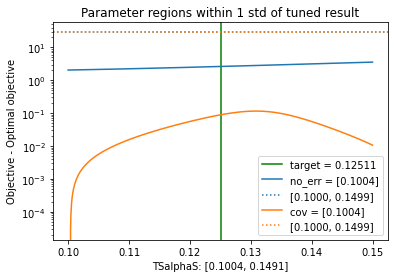

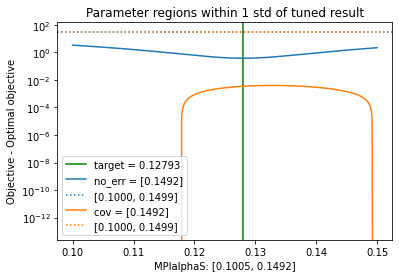

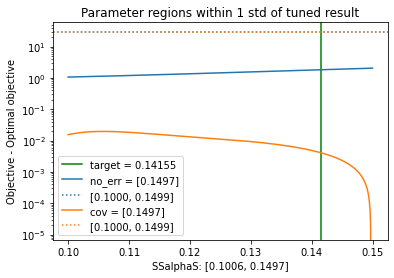

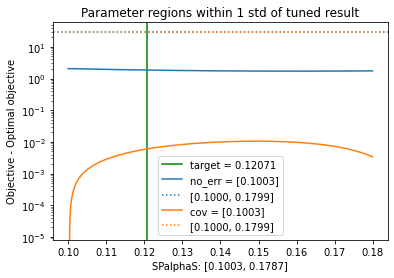

In [6]:
import jax.numpy as jnp
graph_range = [0.1, 0.15]
print(summer_tune_no_err.fits.param_names)
center = summer_tune_cov.p_opt.x
l = True
summer_tune_no_err.graph_objective(['TSalphaS'], center = center, graph_range = graph_range, log_scale = l)
summer_tune_cov.graph_objective(['TSalphaS'], center = center, new_figure = False, graph_range = graph_range, log_scale = l)
summer_tune_no_err.graph_objective(['MPIalphaS'], center = center, graph_range = graph_range, log_scale = l)
summer_tune_cov.graph_objective(['MPIalphaS'], center = center, new_figure = False, graph_range = graph_range, log_scale = l)
summer_tune_no_err.graph_objective(['SSalphaS'], center = center, graph_range = graph_range, log_scale = l)
summer_tune_cov.graph_objective(['SSalphaS'], center = center, new_figure = False, graph_range = graph_range, log_scale = l)
summer_tune_no_err.graph_objective(['SPalphaS'], center = center, graph_range = [0.1,0.18], log_scale = l)
summer_tune_cov.graph_objective(['SPalphaS'], center = center, new_figure = False, graph_range = [0.1,0.18], log_scale = l)

['TSalphaS' 'MPIalphaS' 'SSalphaS' 'SPalphaS']
target deviation 28.8638, with confidence level 0.6827, edof 26.0000
target deviation 28.8638, with confidence level 0.6827, edof 26.0000
target deviation 28.8638, with confidence level 0.6827, edof 26.0000
target deviation 28.8638, with confidence level 0.6827, edof 26.0000
target deviation 28.8638, with confidence level 0.6827, edof 26.0000
target deviation 28.8638, with confidence level 0.6827, edof 26.0000
target deviation 28.8638, with confidence level 0.6827, edof 26.0000
target deviation 28.8638, with confidence level 0.6827, edof 26.0000


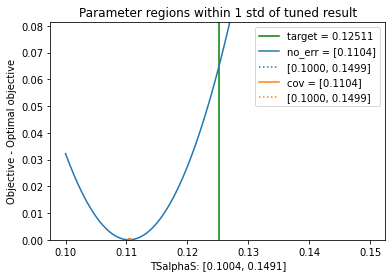

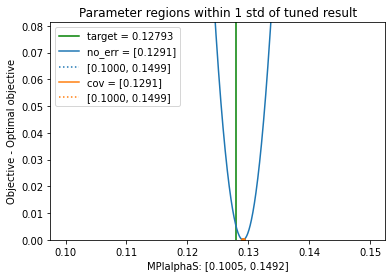

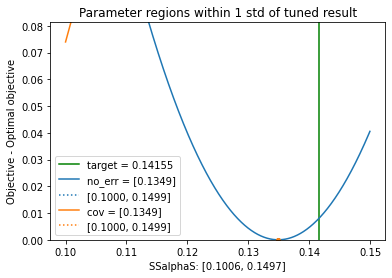

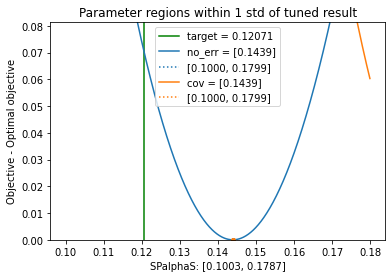

In [11]:
import jax.numpy as jnp
graph_range = [0.1, 0.15]
print(summer_tune_no_err.fits.param_names)
center = summer_tune_no_err.p_opt.x
l = False
summer_tune_no_err.graph_objective(['TSalphaS'], center = center, graph_range = graph_range, log_scale = l)
summer_tune_cov.graph_objective(['TSalphaS'], center = center, new_figure = False, graph_range = graph_range, log_scale = l)
summer_tune_no_err.graph_objective(['MPIalphaS'], center = center, graph_range = graph_range, log_scale = l)
summer_tune_cov.graph_objective(['MPIalphaS'], center = center, new_figure = False, graph_range = graph_range, log_scale = l)
summer_tune_no_err.graph_objective(['SSalphaS'], center = center, graph_range = graph_range, log_scale = l)
summer_tune_cov.graph_objective(['SSalphaS'], center = center, new_figure = False, graph_range = graph_range, log_scale = l)
summer_tune_no_err.graph_objective(['SPalphaS'], center = center, graph_range = [0.1,0.18], log_scale = l)
summer_tune_cov.graph_objective(['SPalphaS'], center = center, new_figure = False, graph_range = [0.1,0.18], log_scale = l)

In [ ]:
import numpy as np
print(summer_tune_no_err.p_opt.x)
print(summer_tune_no_err.objective(summer_tune_no_err.p_opt.x, *summer_tune_no_err.obj_args))
print(summer_tune_no_err.objective(jnp.array([0.127, 0.126, 0.127, 0.140]), *summer_tune_no_err.obj_args))
print(summer_tune_cov.p_opt.x)
print(summer_tune_cov.objective(summer_tune_cov.p_opt.x, *summer_tune_cov.obj_args))
print(summer_tune_cov.objective(jnp.array([0.127, 0.126, 0.127, 0.140]), *summer_tune_cov.obj_args))


[0.116786   0.1294203  0.12563118 0.10280156]
1365.9694121354019
2402.410082647002
[0.10375224 0.13051814 0.10144091 0.14942258]
0.7853231007032646
112.97551975698993


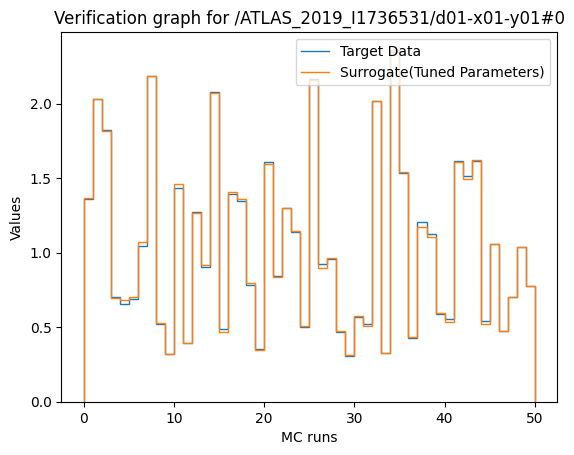

In [ ]:
summer_fits.graph_bin("/ATLAS_2019_I1736531/d01-x01-y01#0")

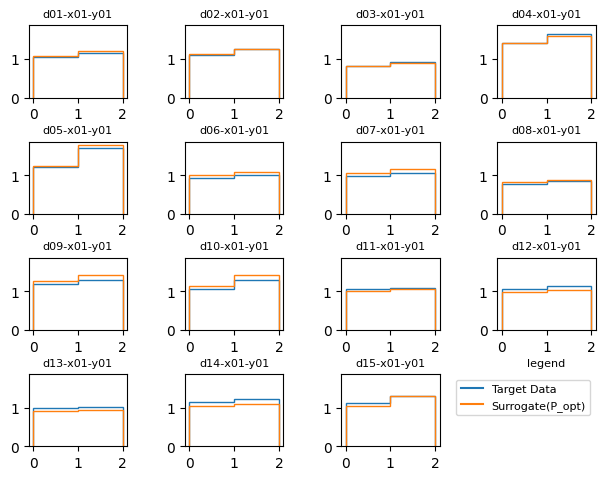

In [ ]:
summer_tune_no_err.graph_tune_all()

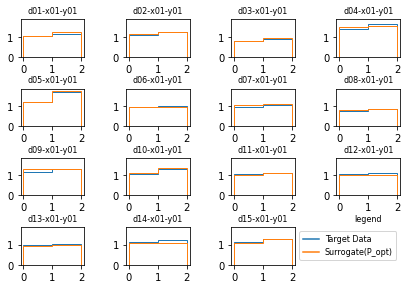

In [ ]:
summer_tune_cov.graph_tune_all()

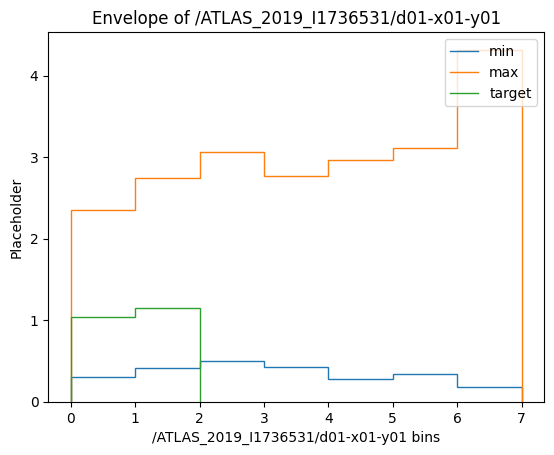

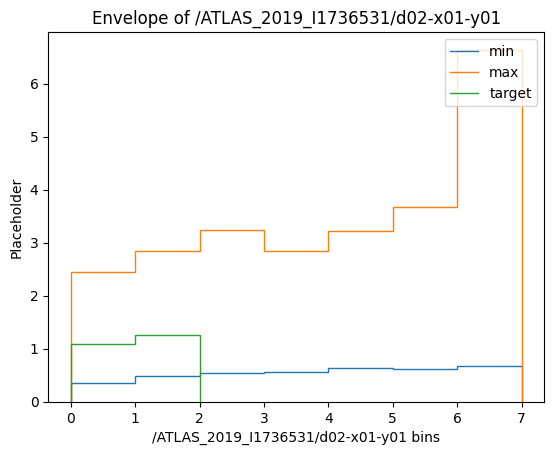

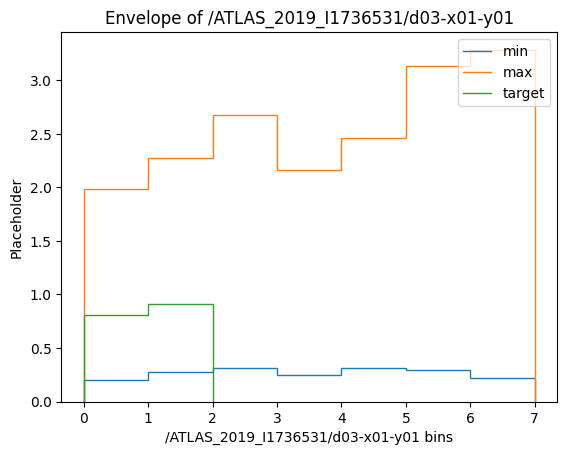

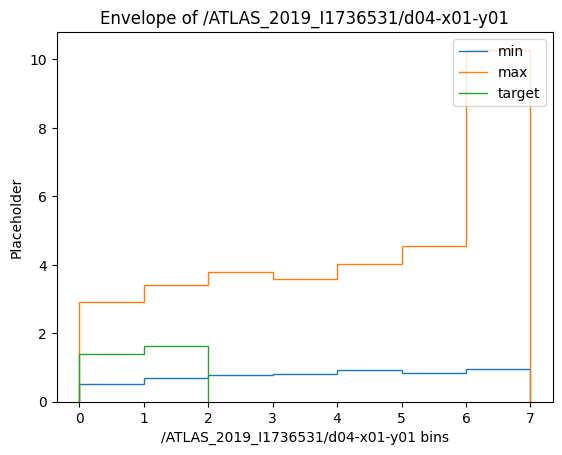

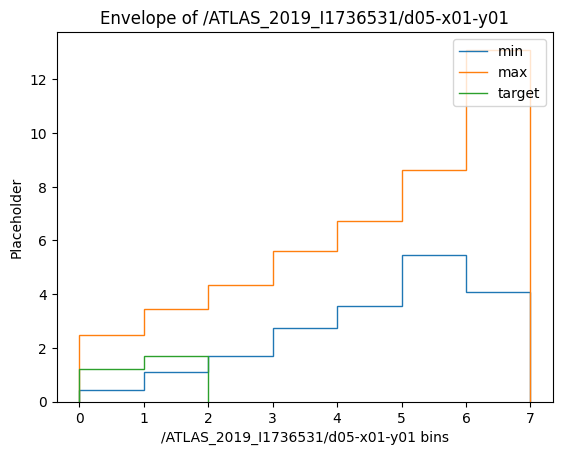

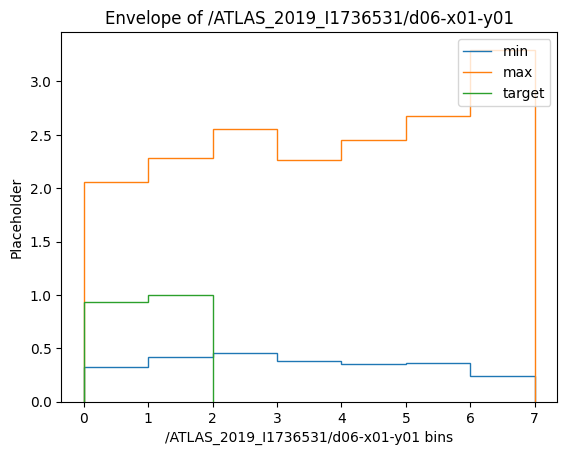

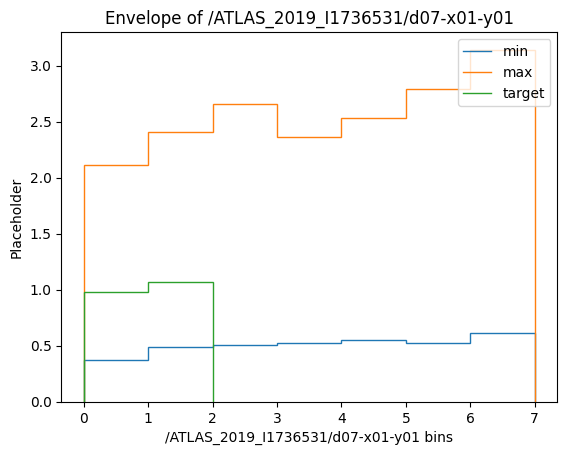

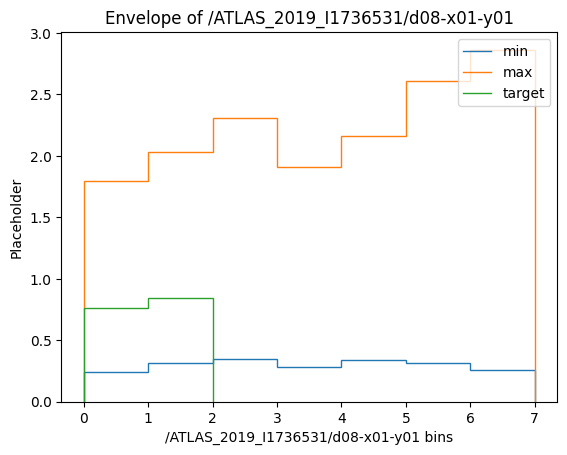

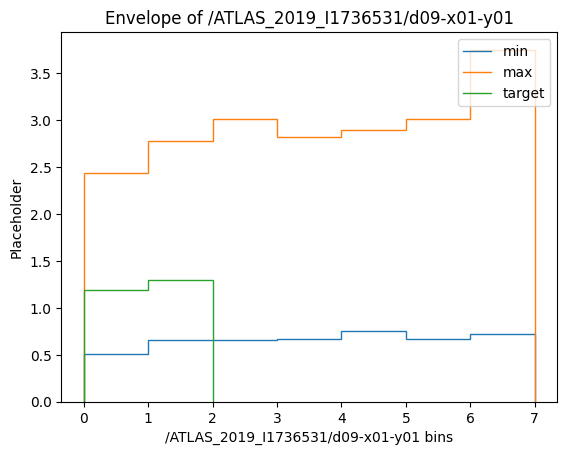

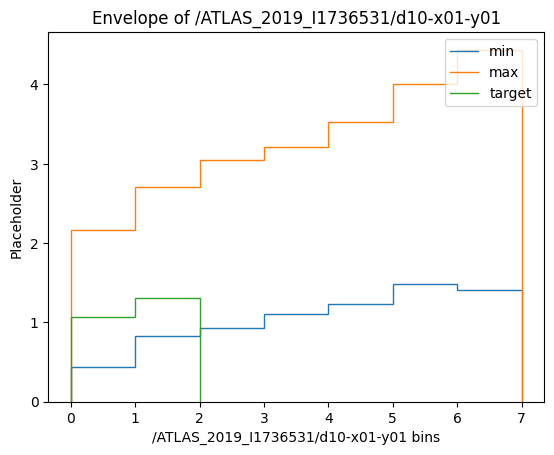

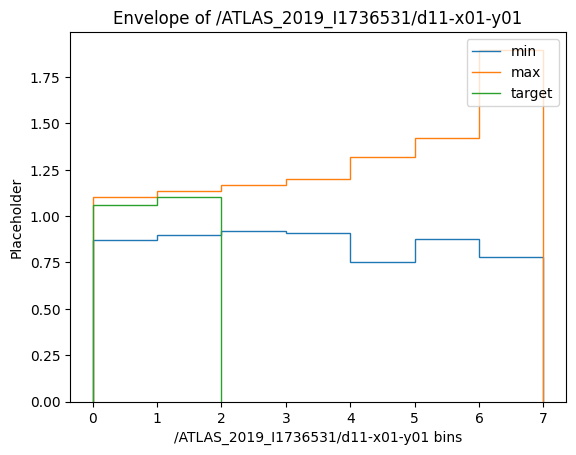

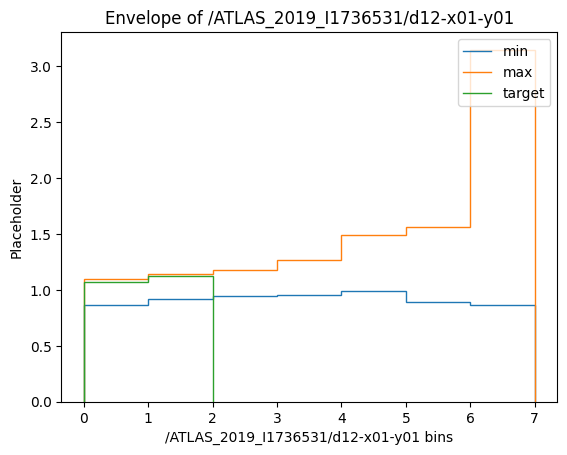

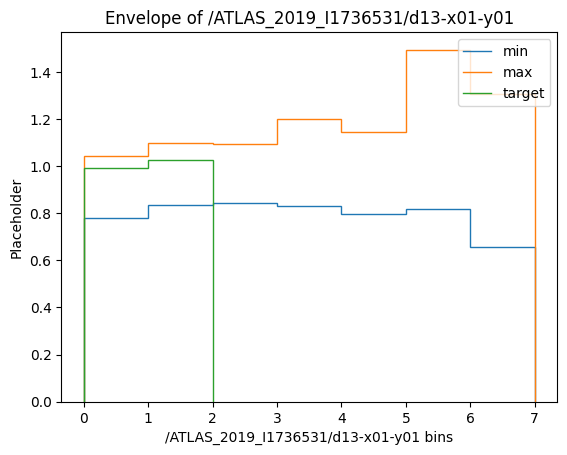

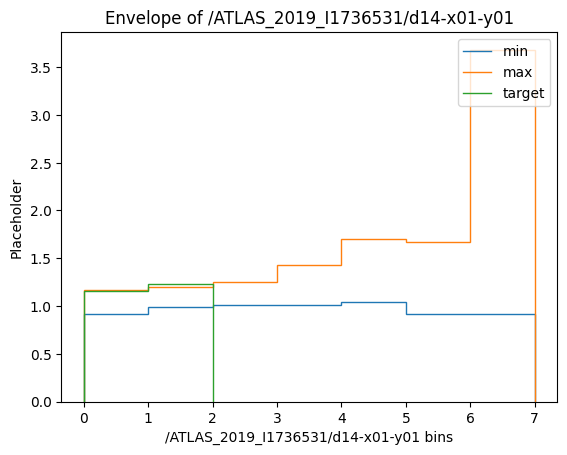

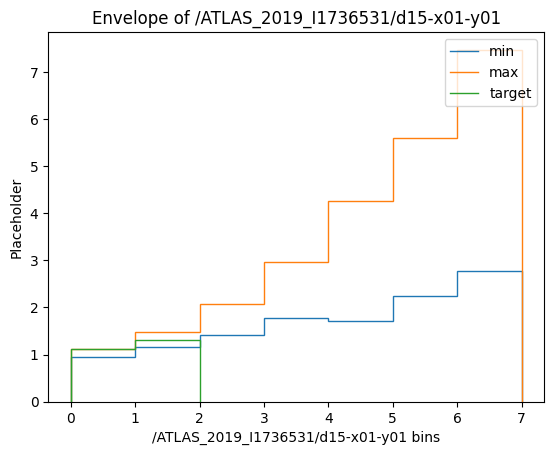

In [ ]:
summer_tune_cov.graph_envelope_target()